In [7]:
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, T5EncoderModel, AutoModel,GPT2Tokenizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("/home/profniggastein/PycharmProjects/embeddingstudy/EmbedingContextData - Sheet1.csv")

#using codebert
model_name = "microsoft/codebert-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)


In [9]:
def embed_code(snippet):
    tokens = tokenizer(snippet, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        output = model(**tokens)
    return output.last_hidden_state[:, 0, :].squeeze().numpy()

In [10]:
df["Embedding"] = df["Code"].apply(embed_code)
df

,ID,Functionality,Naming_Convention,Code,Colour,Embedding
0,ADD-ADD,ADD,ADD,"int add(int a, int b) {\n return a + b;\n}",Red,"[-0.17458771, 0.22082572, -0.117633864, 0.0664..."
1,ADD-FLOOP,ADD,FLOOP,"int sum_to_n(int n, int i) {\n return n + i...",Red,"[-0.1511567, 0.1362745, -0.15532614, 0.1230901..."
2,ADD-WLOOP,ADD,WLOOP,"int count_down(int n, int b) {\n return n +...",Red,"[-0.15214053, 0.1582136, -0.11085951, 0.109019..."
3,ADD-FIB,ADD,FIB,"int fibonacci(int a, int n) {\n return n + ...",Red,"[-0.11755678, 0.19358611, -0.056628197, 0.1102..."
4,ADD-PRIME,ADD,PRIME,"int is_prime(int n, int b) {\n return n + b...",Red,"[-0.15369293, 0.2005972, -0.08185037, 0.109640..."
...,...,...,...,...,...,...
75,MALLOC-WLOOP,MALLOC,WLOOP,int* count_down(int n) {\n int* arr = (int*...,deepskyblue,"[-0.17129049, 0.04919321, -0.112888634, 0.0965..."
76,MALLOC-FIB,MALLOC,FIB,int* fibonacci(int n) {\n int* fibonaci = (...,deepskyblue,"[-0.1857297, 0.06383925, -0.11487689, 0.070506..."
77,MALLOC-PRIME,MALLOC,PRIME,int* is_prime(int n) {\n int* arr = (int*)m...,deepskyblue,"[-0.17327258, 0.06490575, -0.10852056, 0.07775..."
78,MALLOC-FACT,MALLOC,FACT,int* factorial(int n) {\n int* factor = (in...,deepskyblue,"[-0.17675489, 0.042745452, -0.15895247, 0.1020..."


In [11]:

def project_embeddingsTSNE():
    embedding_matrix = np.stack(df["Embedding"].values)


    tsne = TSNE(n_components=2, random_state=42, perplexity=5)
    reduced_embeddings = tsne.fit_transform(embedding_matrix)

    plt.figure(figsize=(20, 10))
    for idx, (x, y) in enumerate(reduced_embeddings):
        color = df["Colour"].iloc[idx]
        label = df["ID"].iloc[idx]
        plt.scatter(x, y, color=color, label=color if not label in plt.gca().get_legend_handles_labels()[1] else "")
        plt.text(x + 0.5, y, label, fontsize=8)

    plt.title("t-SNE Projection of Code Embeddings(codeBERT)")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.tight_layout()
    plt.savefig("t-SNE Projection of Code Embeddings(codeBERT).pdf")
    plt.show()

def project_embeddingsPCA():
    from sklearn.decomposition import PCA
    embedding_matrix = np.stack(df["Embedding"].values)
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embedding_matrix)

    plt.figure(figsize=(12, 10))
    for idx, (x, y) in enumerate(reduced_embeddings):
        color = df["Colour"].iloc[idx]
        label = df["ID"].iloc[idx]
        plt.scatter(x, y, color=color, label=color if not label in plt.gca().get_legend_handles_labels()[1] else "")
        plt.text(x + 0.5, y, label, fontsize=8)

    plt.title("PCA Projection of Code Embeddings(CodeBERT)")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.tight_layout()
    plt.savefig("PCA Projection of Code Embeddings(CodeBERT).pdf")
    plt.show()



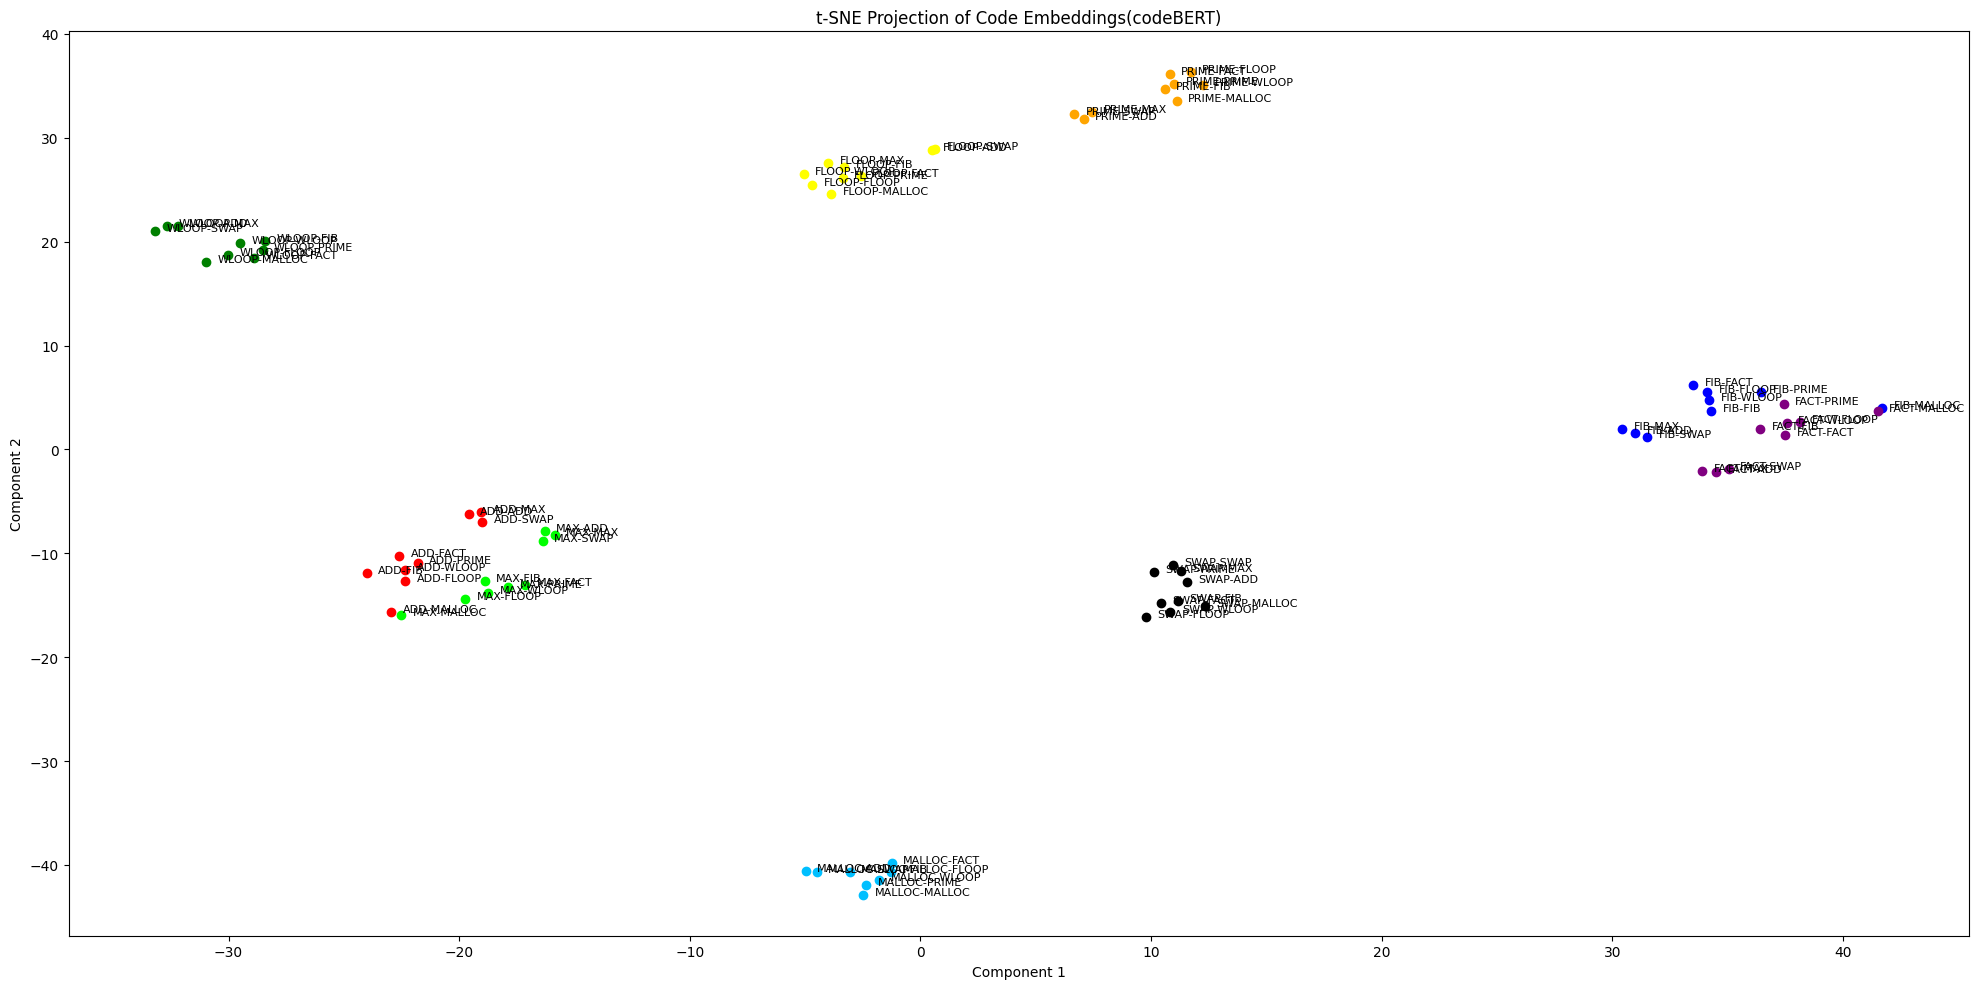

In [12]:
project_embeddingsTSNE()


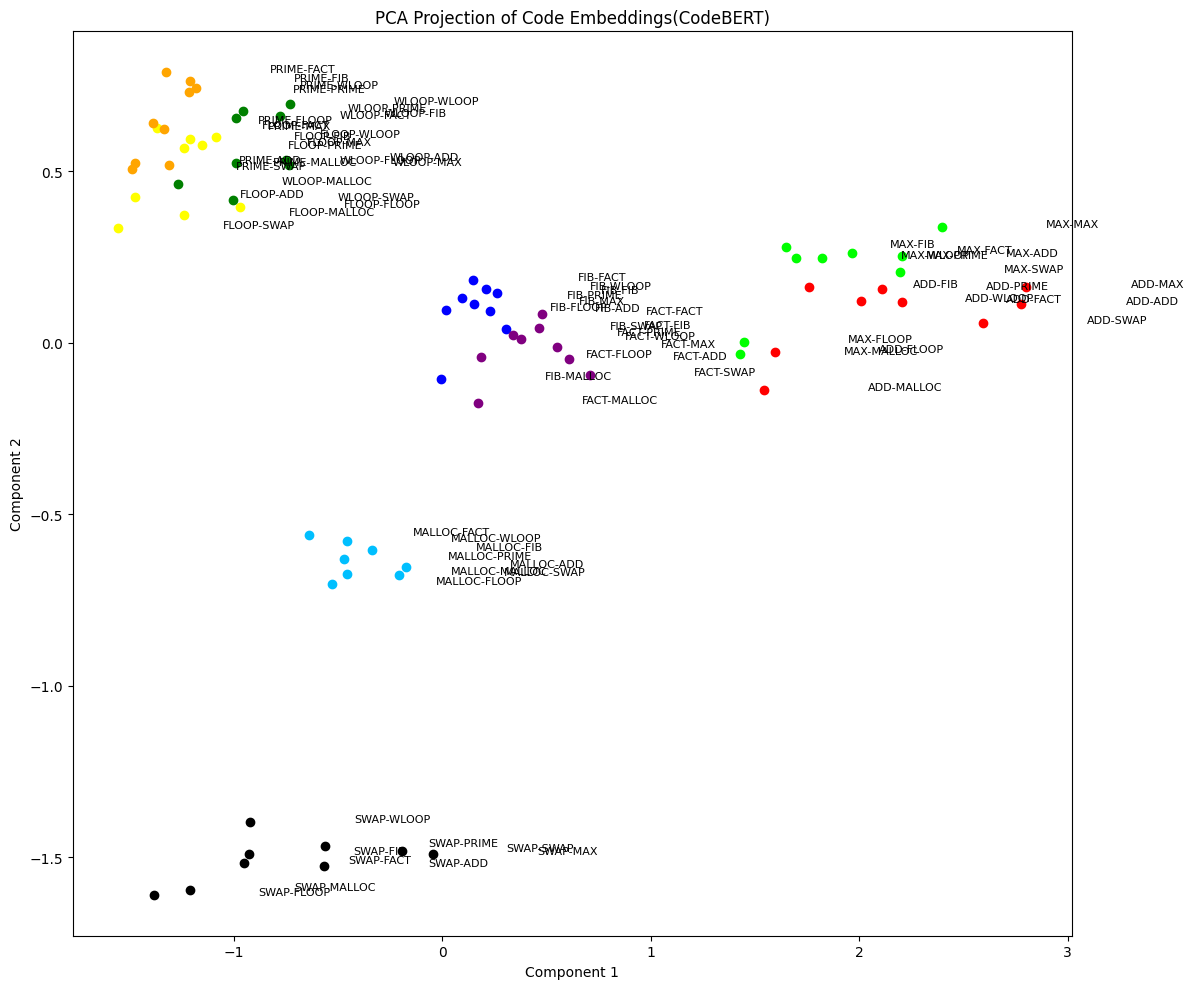

In [13]:
project_embeddingsPCA()

In [14]:
# embedding_matrix = np.stack(df["Embedding"].values)
# tsne = TSNE(n_components=2, random_state=42, perplexity=5)
# reduced_embeddings = tsne.fit_transform(embedding_matrix)
# plt.figure(figsize=(12, 10))
# for idx, (x, y) in enumerate(reduced_embeddings):
#     color = df["Colour"].iloc[idx]
#     label = df["ID"].iloc[idx]
#     plt.scatter(x, y, color=color, label=color if not label in plt.gca().get_legend_handles_labels()[1] else "")
#     plt.text(x + 0.5, y, label, fontsize=8)
#
# plt.title("t-SNE Projection of Code Embeddings")
# plt.xlabel("Component 1")
# plt.ylabel("Component 2")
# plt.tight_layout()
# plt.show()